In [16]:
import os

import torch
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import tqdm as tqdm
from sklearn.model_selection import train_test_split
import torchvision
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.transforms import functional as F

In [2]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
DEVICE

device(type='cpu')

In [5]:
root_folder = './sartorius-cell-instance-segmentation'
train_df = pd.read_csv(root_folder + "/train.csv")
display(train_df.head(2))
print(f'Train data shape: {train_df.shape}')

,id,annotation,width,height,cell_type,plate_time,sample_date,sample_id,elapsed_timedelta
0,0030fd0e6378,118145 6 118849 7 119553 8 120257 8 120961 9 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
1,0030fd0e6378,189036 1 189739 3 190441 6 191144 7 191848 8 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00


Train data shape: (73585, 9)


In [6]:
class_map = {value:idx for idx,value in enumerate(train_df["cell_type"].unique())}
class_map

{'shsy5y': 0, 'astro': 1, 'cort': 2}

In [ ]:
img_id = train_df.iloc[0]["id"]
img_id

'0030fd0e6378'

In [11]:
img = cv2.imread(f'{root_folder}/train/{img_id}.png')
img

array([[[146, 146, 146],
        [154, 154, 154],
        [147, 147, 147],
        ...,
        [123, 123, 123],
        [128, 128, 128],
        [133, 133, 133]],

       [[159, 159, 159],
        [154, 154, 154],
        [135, 135, 135],
        ...,
        [137, 137, 137],
        [138, 138, 138],
        [139, 139, 139]],

       [[128, 128, 128],
        [131, 131, 131],
        [121, 121, 121],
        ...,
        [130, 130, 130],
        [126, 126, 126],
        [125, 125, 125]],

       ...,

       [[135, 135, 135],
        [127, 127, 127],
        [127, 127, 127],
        ...,
        [114, 114, 114],
        [112, 112, 112],
        [129, 129, 129]],

       [[144, 144, 144],
        [141, 141, 141],
        [131, 131, 131],
        ...,
        [118, 118, 118],
        [103, 103, 103],
        [111, 111, 111]],

       [[125, 125, 125],
        [142, 142, 142],
        [144, 144, 144],
        ...,
        [141, 141, 141],
        [137, 137, 137],
        [127, 127, 127]]

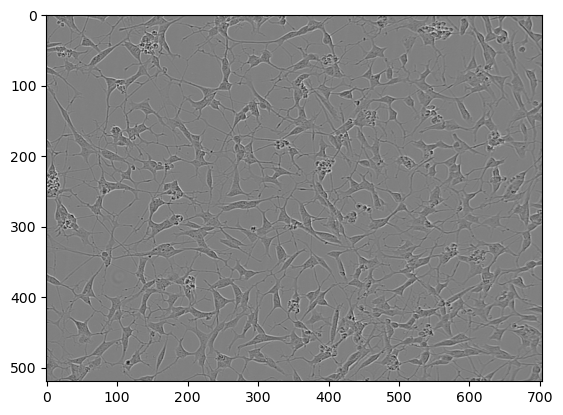

In [12]:
plt.imshow(img)

In [13]:
def get_targets_mask(df, img_id):
    """
    Function to get target masks
    
    rles contains mask's description
    """
    targets = df[df["id"] == img_id]["cell_type"].apply(lambda x: class_map[x]).values 
    rles = df[df["id"] == img_id]["annotation"].values
    
    return targets, rles

In [14]:
images, rles = get_targets_mask(train_df, img_id)

In [15]:
len(rles)

395